In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib inline

Text(0, 0.5, 'Second feature')

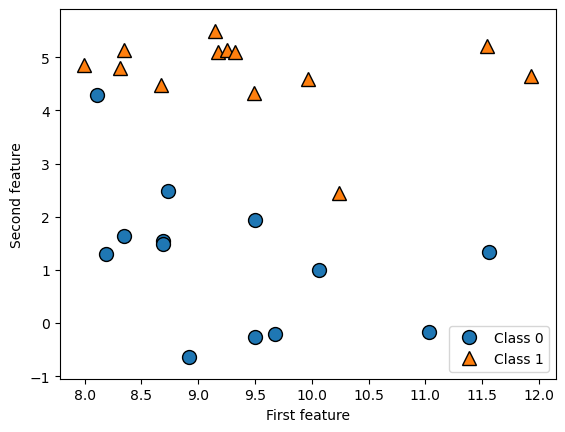

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'])
plt.xlabel("First feature")
plt.ylabel('Second feature')

In [3]:
X.shape

(26, 2)

Text(0, 0.5, 'Target')

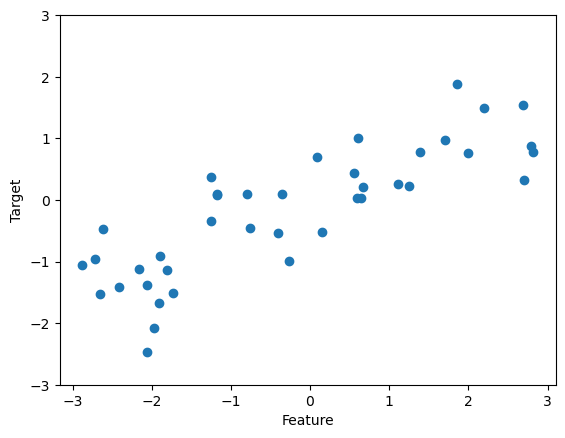

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
print("Sample counts per class:\n{}".format(
    {str(n): str(v) for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': '212', 'benign': '357'}


In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [9]:
boston.shape

(1012, 11)

In [10]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

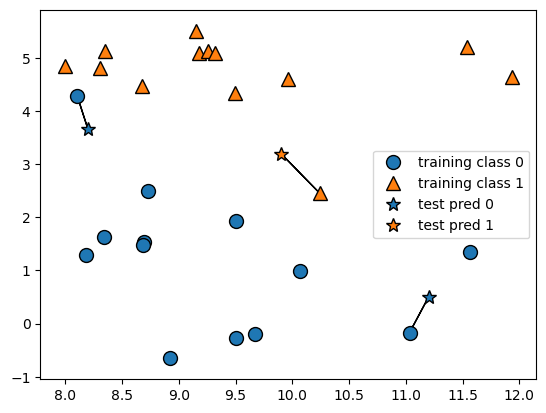

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

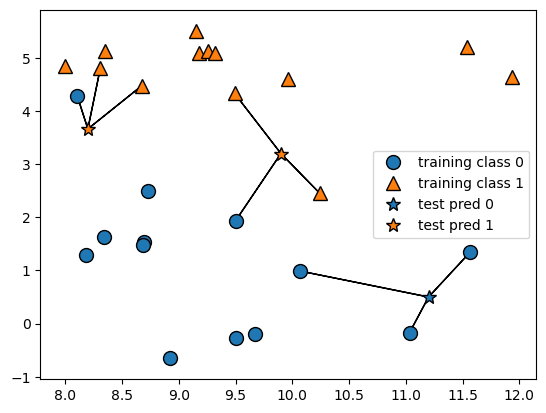

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8571428571428571

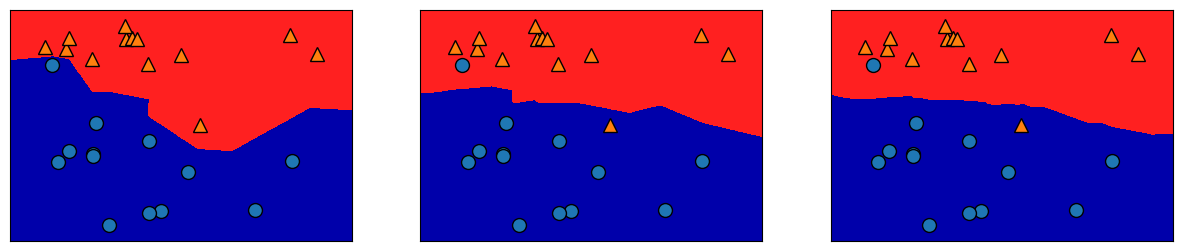

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for n_neigbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neigbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

In [18]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

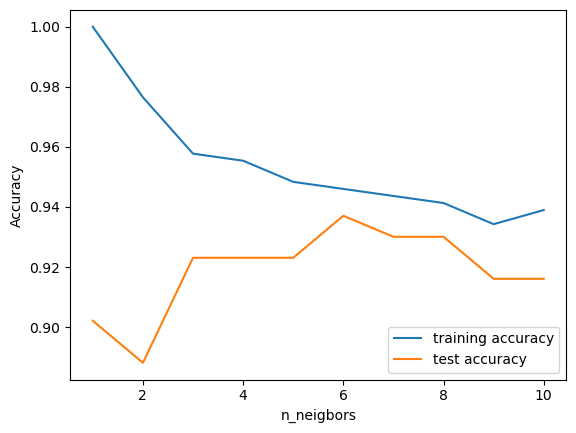

In [19]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neigbors")
plt.ylabel("Accuracy")
plt.legend(loc=4)

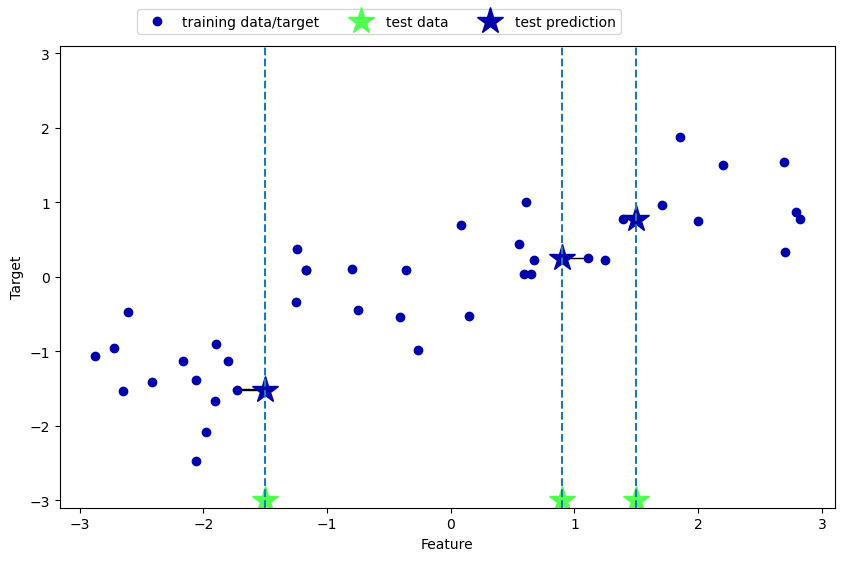

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

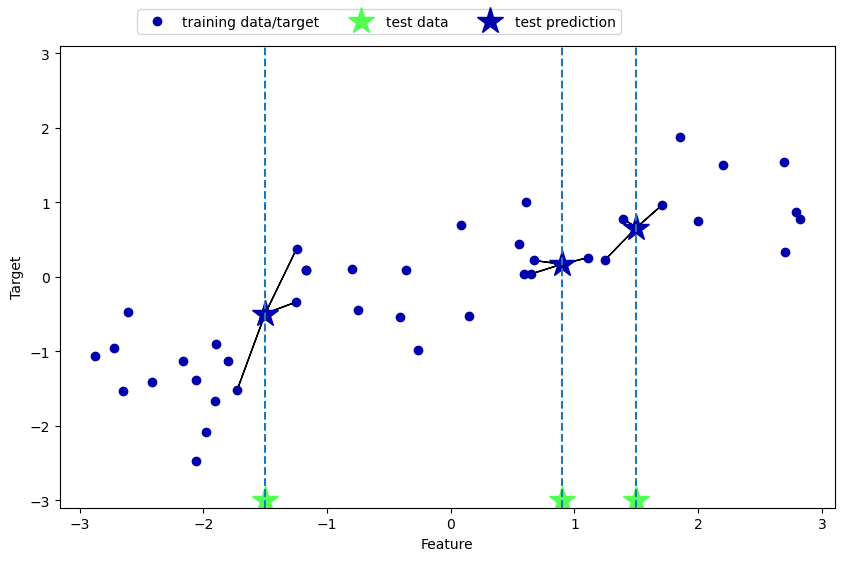

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [23]:
reg.score(X_test, y_test)

0.8344172446249606

w[0]: 0.393906  b: -0.031804


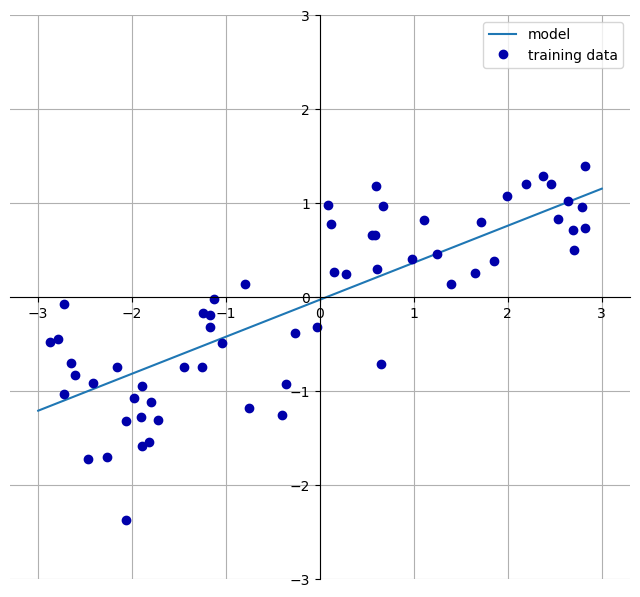

In [24]:
mglearn.plots.plot_linear_regression_wave()

In [25]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [26]:
print(lr.coef_[0])
print(lr.intercept_)

0.3939055511673397
-0.03180434302675966


In [27]:
print(f"Train set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Train set score: 0.67
Test set score: 0.66


In [28]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
lr.score(X_train, y_train)

0.952051960903273

In [30]:
lr.score(X_test, y_test)

0.6074721959666123

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [32]:
ridge.score(X_train, y_train)

0.885796658517094

In [33]:
ridge.score(X_test, y_test)

0.7527683481744758

In [34]:
ridge.coef_.min()

np.float64(-8.591499281027579)

In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369616
0.6359411489177312


In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001988
0.7722067936480148


In [37]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [38]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 4


In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=1_000_000).fit(X_train, y_train)

print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.89622265110865
0.7656571174549982


In [40]:
print(np.sum(lasso001.coef_ !=0))

33


In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1_000_000).fit(X_train, y_train)

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))

0.9507158754515462
0.6437467421273347


In [42]:
print(np.sum(lasso00001.coef_ !=0))

96


In [43]:
# Linear models for classifcation

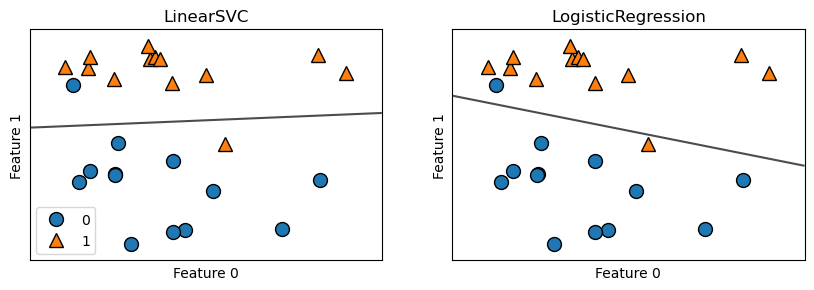

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
    
    

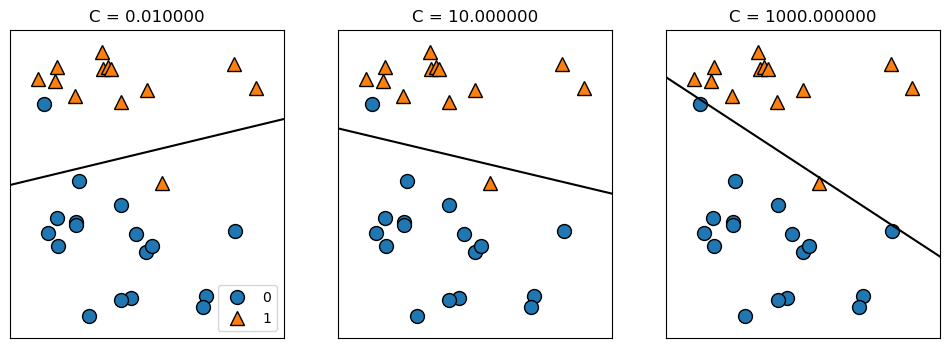

In [45]:
mglearn.plots.plot_linear_svc_regularization()

In [46]:
cancer = load_breast_cancer()
X_train , X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=100_000).fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9577464788732394
0.958041958041958


In [47]:
logreg100 = LogisticRegression(C=100, max_iter=100_000).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9812206572769953
0.965034965034965


In [48]:
logreg001 = LogisticRegression(C=0.01, max_iter=100_000).fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9530516431924883
0.951048951048951


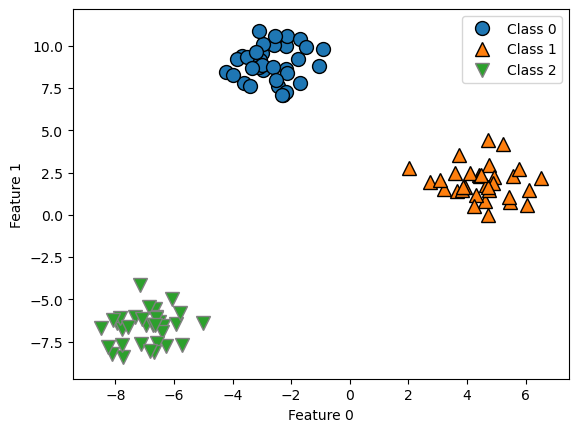

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [50]:
linear_svm = LinearSVC().fit(X, y)

print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [51]:
# Decision trees

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(tree.score (X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9370629370629371


In [52]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(tree.score (X_train, y_train))
print(tree.score(X_test, y_test))

0.9882629107981221
0.951048951048951


In [53]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree, 
    out_file="tree.dot", 
    class_names=cancer.target_names,
    feature_names=cancer.feature_names,
    impurity=False,
    filled=True
)

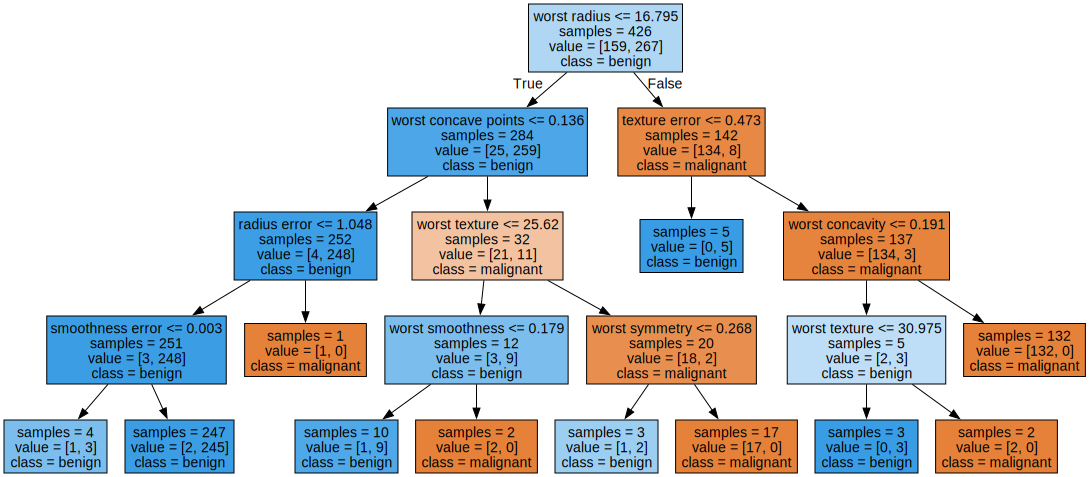

In [54]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [55]:
print(f"Feature impoertances:\n{tree.feature_importances_}")

Feature impoertances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [56]:
import altair as alt

feature_importance = pd.DataFrame(
    {"feature": cancer.feature_names,
     "importance": tree.feature_importances_}
)
feature_importance.head()

,feature,importance
0,mean radius,0.0
1,mean texture,0.0
2,mean perimeter,0.0
3,mean area,0.0
4,mean smoothness,0.0


In [57]:
chart = alt.Chart(feature_importance).mark_bar().encode(
    x="importance:Q",
    y=alt.Y("feature:N", sort="descending")
)
chart

alt.Chart(...)

Text(0, 0.5, 'Price in $/Mbyte')

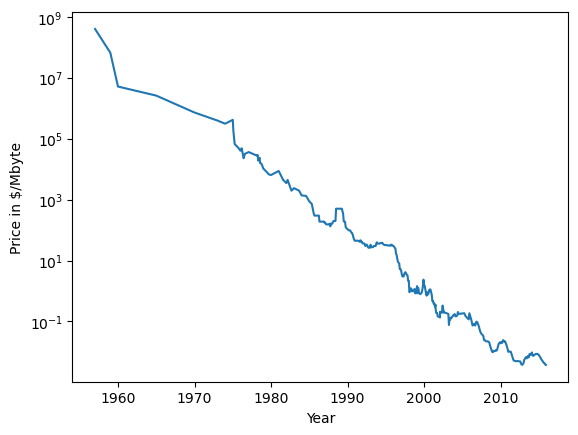

In [58]:
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))


plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train[["date"]].values
y_train = np.log(data_train.price)


tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

X_all = ram_prices[["date"]].values
pred_tree = tree.predict(X_all)
pred_lr = lr.predict(X_all)


price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

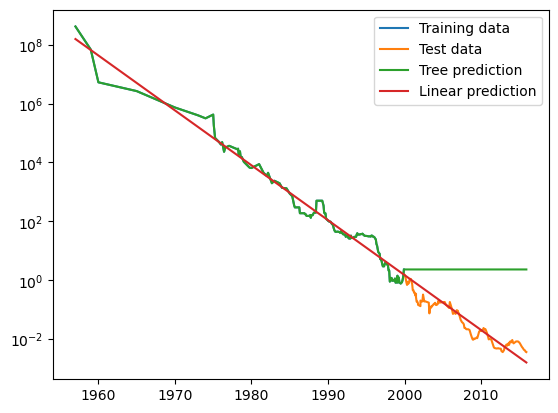

In [60]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()


def tts():


In [61]:
def tts(feature, target, random_state=0, test_size=0.25):
    return train_test_split(
        feature, target, random_state=random_state, test_size=test_size, stratify=target
    )

In [62]:
# Ensembles

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
forest.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

forest = RandomForestClassifier(n_estimators=100,  random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)


print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


In [65]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

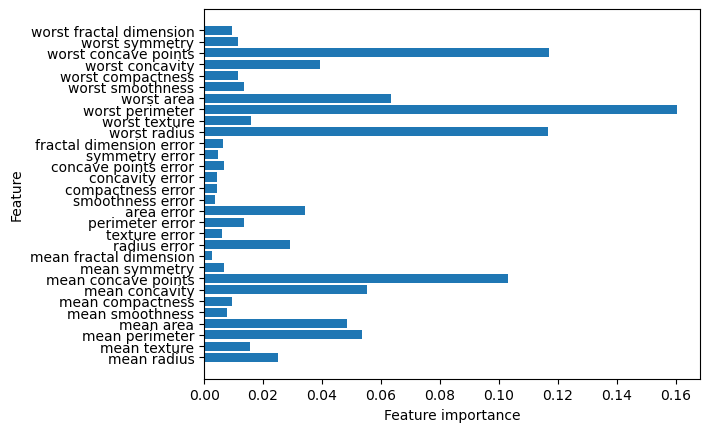

In [66]:
plot_feature_importances_cancer(forest)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [68]:

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9906103286384976
0.972027972027972


In [69]:

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9882629107981221
0.958041958041958


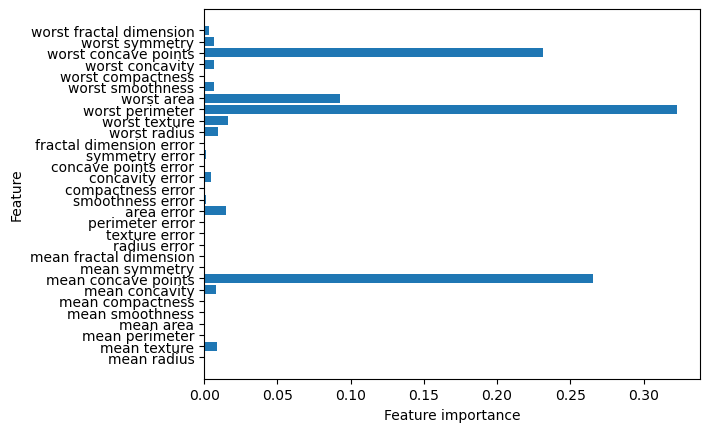

In [70]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [71]:
# SVM
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.903755868544601
0.9370629370629371


In [72]:
# preprocessing

min_on_training = X_train.min(axis=0)

range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

In [73]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)

print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972


In [74]:
# Neural Networks

Text(0, 0.5, 'relu(x), tanh(x)')

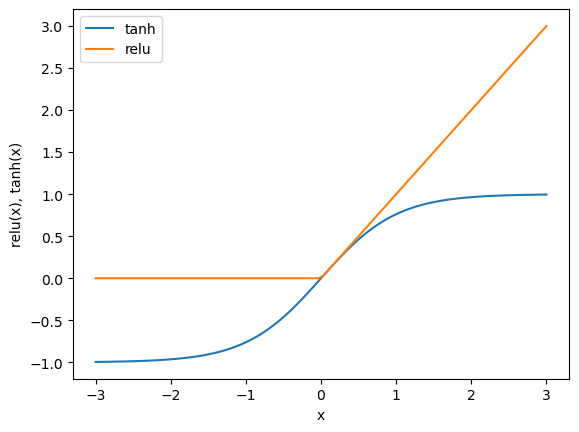

In [75]:
line = np.linspace(-3, 3, 100)

plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.88


Text(0, 0.5, 'Feature 1')

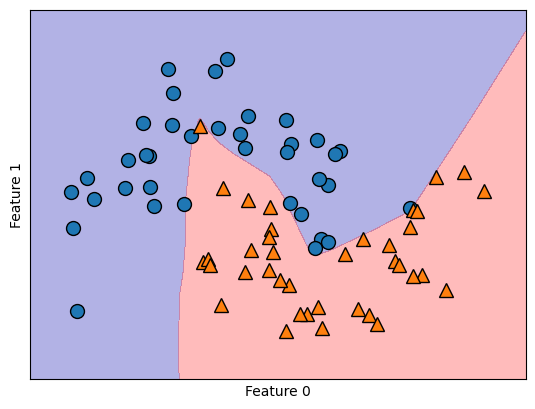

In [77]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [78]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9866666666666667
0.88


Text(0, 0.5, 'Feature 1')

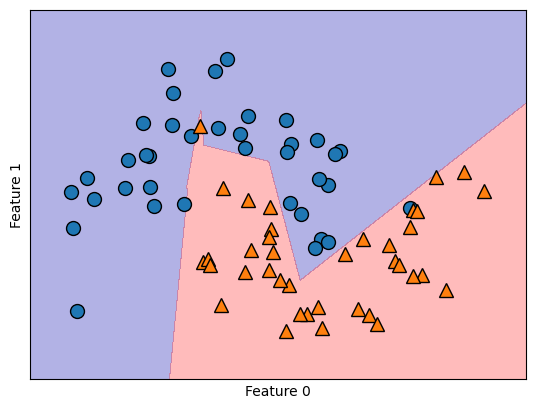

In [79]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [80]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9866666666666667
0.84


Text(0, 0.5, 'Feature 1')

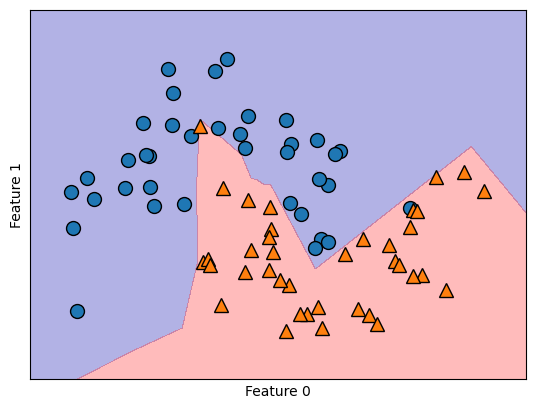

In [81]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [128]:
mlp = MLPClassifier(
    solver="lbfgs", activation="tanh", random_state=0, hidden_layer_sizes=[10, 10]
).fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9460093896713615
0.9300699300699301


/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

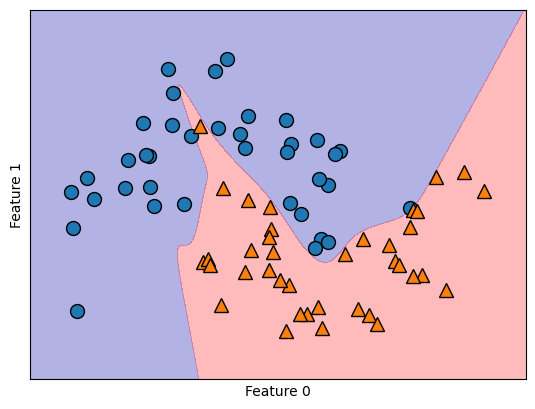

In [83]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 181 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages

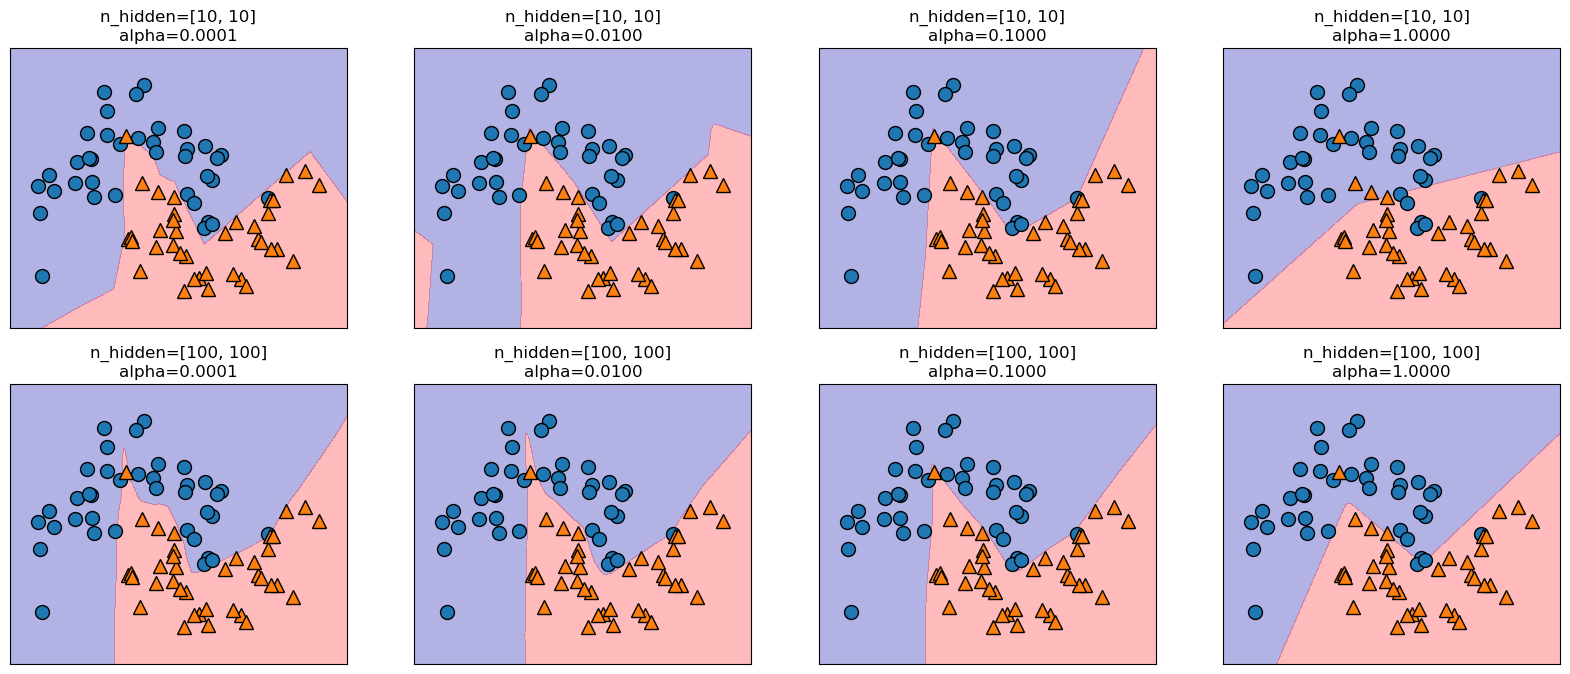

In [84]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(
            solver="lbfgs",
            random_state=0,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
            alpha=alpha,
        )
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title(
            "n_hidden=[{}, {}]\nalpha={:.4f}".format(
                n_hidden_nodes, n_hidden_nodes, alpha
            )
        )

In [94]:
cancer.data.max(axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9389671361502347
0.916083916083916


In [125]:
mlp = MLPClassifier(max_iter=1_000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9788732394366197
0.958041958041958


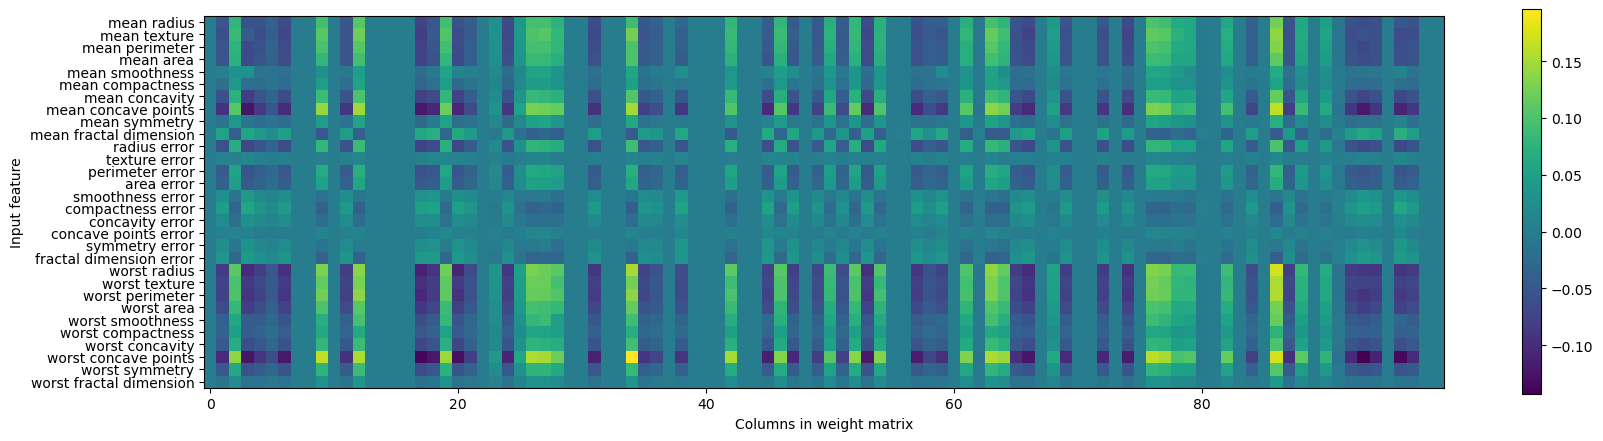

In [126]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()